In [1]:
%load_ext autoreload
%autoreload 2

import warnings
from pathlib import Path

import pandas as pd
import seaborn as sns
import yaml
from matplotlib import pyplot as plt

from analysis.dataset.june_dataset import JuNEDataset

warnings.filterwarnings("ignore")
sns.reset_orig()
plt.style.use('https://github.com/klieret/simple-science-style/raw/main/stylesheets/sss1.mplstyle')
plt.rcParams["font.family"] = "Times New Roman"


In [2]:
def read_config(config_path: Path = Path("data_config.yaml")) -> dict:
    with config_path.open("r") as stream:
        try:
            return yaml.safe_load(stream)
        except yaml.YAMLError:
            return {}


config = read_config()


In [3]:
df_hack = pd.read_csv(config.get("dataset_path"), index_col=0)
df_labels = pd.read_csv(config.get("label_mapping_path"), index_col=0)
df_hack = df_hack.merge(df_labels, on='action_id')

df_hack.head()


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,user_id,expert,cell_label
0,0,2023-05-06 10:32:26.282,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,save_notebook,NaN,NaN,NaN,"[\n {\n ""id"": ""35c0b3b694f84140846a21197ea...",NaN,student_7,False,NaN
1,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,NaN,student_7,False,helper_functions
2,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,helper_functions
3,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,NaN,student_7,False,helper_functions
4,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,helper_functions


In [4]:
june = JuNEDataset(df_hack)
june.prepare_dataset()
june.df.head()


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,user_id,expert,cell_label,task
0,0,2023-05-06 10:32:26.282,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,save_notebook,None,None,None,"[\n {\n ""id"": ""35c0b3b694f84140846a21197ea...",None,student_7,False,,task1
1,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,None,student_7,False,helper_functions,task1
2,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,helper_functions,task1
3,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,None,student_7,False,helper_functions,task1
4,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,helper_functions,task1


In [5]:
data_df = june.df
data_df['quartile'] = None
data_df


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,user_id,expert,cell_label,task,quartile
0,0,2023-05-06 10:32:26.282,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,save_notebook,None,None,None,"[\n {\n ""id"": ""35c0b3b694f84140846a21197ea...",None,student_7,False,,task1,None
1,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,None,student_7,False,helper_functions,task1,None
2,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,helper_functions,task1,None
3,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,None,student_7,False,helper_functions,task1,None
4,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,helper_functions,task1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23617,23617,2023-08-18 18:00:52.629,9889103b-e51e-418f-b890-ab42ef266bc5,789ccc53-ffd3-48ba-9135-13fc8c1ce0c0,task1.ipynb,finished_execute,aa46744a5169409ab0eaef0df6319217,35.0,code,for i in range(len(list(array_of_dates))):\n ...,"[{""output_type"":""stream"",""size"":38978},{""outpu...",student_10,False,data_exploration,task1,None
23618,23618,2023-08-18 18:01:10.991,9889103b-e51e-418f-b890-ab42ef266bc5,789ccc53-ffd3-48ba-9135-13fc8c1ce0c0,task1.ipynb,execute,351dbffd267149b18870f078fff8b438,33.0,code,import copy\nall_datas = list(df['action_time'...,None,student_10,False,,task1,None
23619,23619,2023-08-18 18:01:14.946,9889103b-e51e-418f-b890-ab42ef266bc5,789ccc53-ffd3-48ba-9135-13fc8c1ce0c0,task1.ipynb,finished_execute,351dbffd267149b18870f078fff8b438,34.0,code,import copy\nall_datas = list(df['action_time'...,"[{""output_type"":""stream"",""size"":704}]",student_10,False,,task1,None
23620,23620,2023-08-18 18:01:45.019,9889103b-e51e-418f-b890-ab42ef266bc5,789ccc53-ffd3-48ba-9135-13fc8c1ce0c0,task1.ipynb,execute,aa46744a5169409ab0eaef0df6319217,34.0,code,for i in range(len(list(array_of_dates))):\n ...,None,student_10,False,data_exploration,task1,None


In [6]:
lim = 10
res = dict(tuple(data_df.groupby(['user_id', 'notebook_name'])))
user_notebook_index = {
    k: v['action_id'].to_list() for k, v in res.items()
}

user_notebook_quartiles = {}
for k, v in res.items():
    quartiles = []
    if len(v) == 1:
        user_notebook_quartiles[k] = [0]
        continue

    limits = range(0, len(v), round(len(v) / lim))
    for i in range(lim):
        times = (
            abs(len(v) - (round(len(v) / lim) * i))
            if i == (lim - 1)
            else round(len(v) / lim)
        )
        tmp_list = [i] * times
        for each in tmp_list:
            quartiles.append(each)

    user_notebook_quartiles[k] = quartiles


In [7]:
for k, v in user_notebook_quartiles.items():
    i = user_notebook_index.get(k)
    if len(i) == len(v):
        for idx in range(len(i)):
            data_df.loc[i[idx], 'quartile'] = v[idx]
    else:
        print("error in ", k)


In [8]:
labels = [
    'helper_functions', 'load_data',
    'data_preprocessing', 'data_exploration',
    'modelling', 'evaluation', 'prediction',
    'result_visualization', 'save_results',
    'comment_only'
]


In [9]:
df_plot = pd.DataFrame(labels, columns=['labels'])
df_plot.set_index('labels', inplace=True)
quartiles = set(data_df.quartile.values)

for each in quartiles:
    df_plot[each] = None

for label in labels:
    temp = data_df[data_df['cell_label'] == label].quartile.value_counts().to_dict()
    for k, v in temp.items():
        df_plot.loc[label, k] = v


In [10]:
df_plot.dropna(axis=1, how='all', inplace=True)
df_plot.fillna(0, inplace=True)


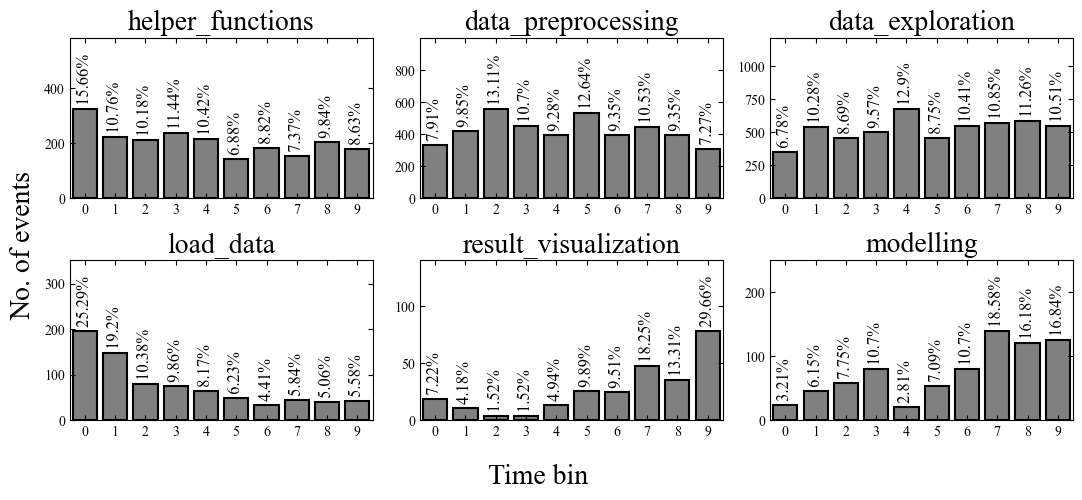

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(11, 5))
fig.subplots_adjust(left=7, bottom=7, right=9, top=9, wspace=0.2, hspace=0.5)

labels_to_plot = [
    'helper_functions', 'data_preprocessing', 'data_exploration',
    'load_data', 'result_visualization', 'modelling'
]

index = 0
for row in range(1, 3):
    for col in range(1, 4):
        y = list(df_plot.loc[labels_to_plot[index]][list(quartiles)].values)
        x = list(quartiles)
        tot = sum(y)
        values = [str(round((each / tot) * 100, 2)) + "%" for each in y]
        plot = sns.barplot(
            ax=axs[row - 1, col - 1], x=x, y=y, color='gray',
            linewidth=1.5, edgecolor="k"
        )

        plot.set_title(labels_to_plot[index], fontsize=20)
        axs[row - 1, col - 1].tick_params(axis='x', rotation=0)
        for p, val in zip(plot.patches, y):
            plot.annotate(" " + str(round((val / tot) * 100, 2)) + "%",
                          xy=(p.get_x() + p.get_width() / 2,
                              p.get_height()), ha='center',
                          va='bottom',
                          rotation=90, fontsize=12)
        index += 1
        axs[row - 1, col - 1].set_ylim(0, max(y) * 1.8)
        plot.minorticks_off()

fig.supxlabel("Time bin", fontsize=20)
fig.supylabel("No. of events", fontsize=20)

fig.tight_layout()
fig.savefig('figures/workflow/ds_steps_over_notebook.pdf', dpi=300, bbox_inches='tight')
plt.show()
